In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa import stattools
%matplotlib inline
import matplotlib.pyplot as plt

/home/aspiring1/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
air_miles = pd.read_csv('../us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.head()

,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
0,1963-01,6827.0
1,1963-02,6178.0
2,1963-03,7084.0
3,1963-04,8162.0
4,1963-05,8462.0


In [3]:
air_miles.index = air_miles['Month']

In [4]:
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970': 'Miles Flown'}, inplace = True)

In [5]:
air_miles.head()

,Month,Miles Flown
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


In [6]:
print('Shape of the dataframe: ', air_miles.shape)

Shape of the dataframe:  (97, 2)


In [7]:
# Check for missing values and remove the rows.
missing = (air_miles['Month'].isnull() | air_miles['Miles Flown'].isnull())
print('Number of missing values found: ', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found:  1


In [8]:
MA12 = air_miles['Miles Flown'].rolling(window = 12).mean()
trendcomp = MA12.rolling(window = 2).mean()

In [9]:
residuals = air_miles['Miles Flown'] - trendcomp

month = air_miles['Month'].apply(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by = month).agg(['mean']).dropna()
#Number of years for which we have the data
num_years = 1970 - 1963 + 1

seasonalComp = np.array([monthwise_avg.as_matrix()] * num_years).reshape((12*num_years, ))

In [10]:
# After deducting the trend and seasonal component we are left with irregular variations.
irr_var = air_miles['Miles Flown'].dropna() - trendcomp - seasonalComp

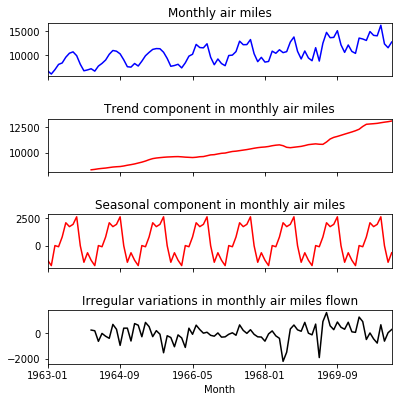

In [11]:
# Plot the original time series, trend, seasonal and random components.
fig, axarr = plt.subplots(4, sharex = True)
fig.set_size_inches(5.5, 5.5)

air_miles['Miles Flown'].plot(ax = axarr[0], color ='b', linestyle = '-')
axarr[0].set_title('Monthly air miles')

trendcomp.plot(ax = axarr[1], color = 'r', linestyle = '-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(seasonalComp, index = air_miles.index).plot(ax = axarr[2], color ='r', linestyle = '-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data = irr_var, index = air_miles.index).plot(ax = axarr[3], color ='k', linestyle = '-')
axarr[3].set_title('Irregular variations in monthly air miles flown')

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad= 2.0)

In [12]:
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')

In [13]:
print('p-value of the adf test on the irregular variation in air miles flown: ', adf_result[1])

p-value of the adf test on the irregular variation in air miles flown:  0.06577411025730101
